In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()

#test= pd.read_pickle("test.pkl") 
# test.pkl is error (in bert.ipynb)

df_ = pd.read_pickle("CKIP.pkl")
df = pd.read_pickle("train.pkl")
df

# 用sequentail model
# 有負值用naive_bayes會失敗

In [104]:
target_feature = 'claim'
data = df.filter([target_feature + "_vector",'category'])
data

,claim_vector,category
0,"[[0.5118343, 0.2832612, -0.5664241, 0.02663630...",0
1,"[[0.48064676, -0.035909783, 0.12545203, 0.1254...",0
2,"[[1.006052, 0.0018780907, 0.0010036384, 0.1689...",0
3,"[[0.07534623, 0.068638965, -0.24728344, -0.110...",0
4,"[[0.78684986, -0.06461421, 0.086510755, 0.0984...",0
...,...,...
4209,"[[0.4857521, 0.054854333, -0.72105014, 0.73758...",4
4210,"[[0.46975717, -0.1995936, -0.81154597, 0.23500...",4
4211,"[[-0.00020017827, -0.6203824, -0.53798896, -0....",4
4212,"[[0.453864, 0.023209458, -0.1598744, 0.3983718...",4


In [ ]:
X_train,X_test = df["claim_vector"], df["label"]
y_train,y_test = test["claim_vector"], test["label"]
#train_data, test_data = train_test_split(df,test, random_state=77, train_size=0.9,shuffle=True)
print(X_train)
print(y_train)

In [106]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3581,)
(633,)
(3792, 1)
(422, 1)


#test_data=data[(data.category!="健康")& (data.category!="生活")]
train_data=data[(data.category!="health")]
print(train_data)

from sklearn.model_selection import train_test_split
test_data=data[data.category=="health"]
#train_data2=data[data.category=="生活"]
#train_data=pd.concat([train_data1,train_data2])
print(test_data)

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

input_dim = x_train.shape[1]
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(lr=0.001)
model.compile(optimizer = adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train, validation_split=0.1, epochs=100,batch_size=200, verbose=2)

In [139]:
# testing data
score = model.evaluate(x_test, y_test)
print("test loss, test acc:", score)

422/422 [==============================] - 0s 24us/sample - loss: 0.3494 - acc: 0.8815
test loss, test acc: [0.34937885361260146, 0.8815166]


In [138]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 64)                49216     
_________________________________________________________________
dense_73 (Dense)             (None, 6)                 390       
Total params: 49,606
Trainable params: 49,606
Non-trainable params: 0
_________________________________________________________________


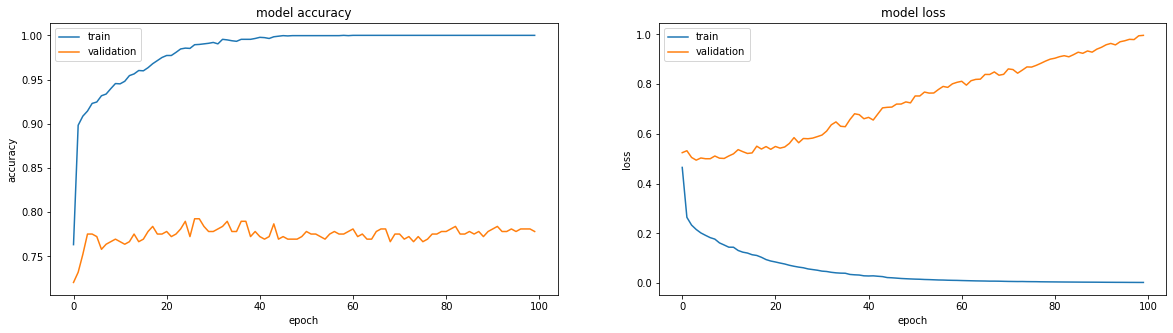

In [12]:
import matplotlib.pyplot as plt
plt.subplots(1,2,figsize=(20,5))
history_dict = history.history
#print(history_dict.keys())

# summarize history for accuracy
ax1 = plt.subplot(121)
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
ax2 = plt.subplot(122)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cvscores = []
f1_scores = []
count = 1
input_dim = x_train.shape[1]
for train, test in kfold.split(x_train, y_train):
    print("Fold {}".format(count))
    count += 1
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(lr=0.001)
    model.compile(optimizer = adam,
                loss='binary_crossentropy',
                metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, verbose=0)
    # evaluate the model
    scores = model.evaluate(x_train[test], y_train[test], verbose=0)
    y_pred = model.predict_classes(x_train[test], verbose=0)
    f1 = f1_score(y_train[test], y_pred)
    confmat = confusion_matrix(y_train[test], y_pred)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("F1 Score: %.2f%%" % (np.mean(f1*100)))
    print("Confusion Matrix:\n {}".format(confmat))
    print("\n")
    cvscores.append(scores[1] * 100)
    f1_scores.append(f1 * 100)
    
print("Average accuracy : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("Average F1 score : %.2f%% (+/- %.2f%%)" % (np.mean(f1_scores), np.std(f1_scores)))

In [ ]:
label_list = ["0", "1"]

predicted = model.predict(x_test)
result = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted} )

for predicted_item, result in zip(predicted, y_test):
    print(label_list[predicted_item], ' - ', label_list[result])

# classify category


In [ ]:
# classify category
x_train = train_data[target_feature + "_vector"].values
y_train = train_data['category'].values
x_train = np.vstack(x_train)
y_train = np.vstack(y_train)

x_test = test_data[target_feature + "_vector"].values
y_test = test_data['category'].values
x_test = np.vstack(x_test)
y_test = np.vstack(y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# classify category
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

input_dim = x_train.shape[1]
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(6, activation='softmax'))

adam = Adam(lr=0.001)
model.compile(optimizer = adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train, validation_split=0.1, epochs=30,batch_size=200)

In [ ]:
category_list = ["0", "1", "2", "3", "4", "5", "6"]
category_list = ["",""]


predicted = model.predict(x_test)
result_bayes = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

# testing data
score = model.evaluate(x_test, y_test)
print("test loss, test acc:", score)

model.summary()

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confmat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.show()

y=data["label"]
X=data.drop(["label"],axis=1).drop(["category"],axis=1)
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print(X_train)
print(y_test)

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)
X_val_minmax = min_max_scaler.fit_transform(X_val)

from keras.utils import to_categorical
y_train_minmax = to_categorical(y_train)
y_test_minmax = to_categorical(y_test)
y_val_minmax = to_categorical(y_val)

input_shape = X_train[target_feature + "_vector"].iloc[0].shape[1]
print(input_shape)

input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(lr=0.001)
model.compile(optimizer = adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, verbose=2)

# testing data
score = model.evaluate(x_test, y_test)
print("test loss, test acc:", score)